# Risultati dello script SRANK
L'obiettivo è stabilire l'importanza di ciascuna feature per la procedura di feature selection.

Il risultato è una score per ogni feature, più è alta, più è utile al clustering.

In [4]:
#librerie
from entropy_selection_class import dataframe_ext
from entropy_RANK import SRANK
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
#import del dataframe
df = pd.read_csv("../DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)
df = df.drop(columns=["ClientID"])

current_investment = ["PortfolioRisk", "PortfolioHorizon", "AuM", "BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]
person_var = ["RiskPropension", "ClientInvestmentHorizon", "ClientKnowledgeExperience", "ClientPotentialIndex",
             "IncomeHighLow", "Sex", "Age", "IncomeNeed", "LongTermCareNeed", "ProtectionNeed",
             "InheritanceIndex", "PanicMood", "ClientDateStart", "NoTrustInBanks"]
df_start = df[person_var]

#impostazione di alcuni parametri per lo script
N_SAMPLE = 40
SAMPLE_SIZE = 100
max_score = (len(df_start.columns) - 1)*N_SAMPLE

###########################################
# SCRIPT RUN                              #
###########################################
scores = SRANK(df_start, N_SAMPLE = N_SAMPLE, SAMPLE_SIZE = SAMPLE_SIZE)

SAMPLE:  0
	 features: 
		 RiskPropension
		 ClientInvestmentHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 InheritanceIndex
		 PanicMood
		 ClientDateStart
		 NoTrustInBanks
SAMPLE:  1
	 features: 
		 RiskPropension
		 ClientInvestmentHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 InheritanceIndex
		 PanicMood
		 ClientDateStart
		 NoTrustInBanks
SAMPLE:  2
	 features: 
		 RiskPropension
		 ClientInvestmentHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongTermCareNeed
		 ProtectionNeed
		 InheritanceIndex
		 PanicMood
		 ClientDateStart
		 NoTrustInBanks
SAMPLE:  3
	 features: 
		 RiskPropension
		 ClientInvestmentHorizon
		 ClientKnowledgeExperience
		 ClientPotentialIndex
		 IncomeHighLow
		 Sex
		 Age
		 IncomeNeed
		 LongT

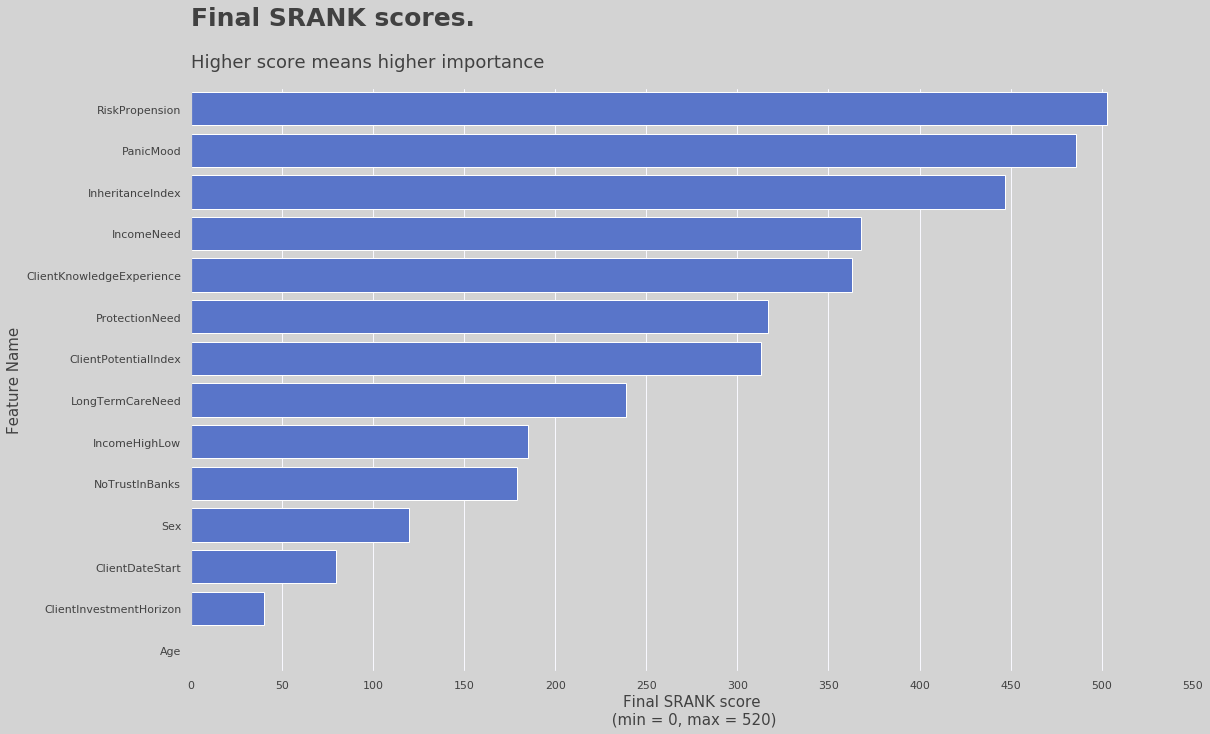

<Figure size 432x288 with 0 Axes>

In [7]:
###########################################
# PLOTTING                                #
###########################################
plt.figure(figsize = (16, 10))
mpl.style.use('fivethirtyeight')
sns.set(rc = {
                'axes.facecolor':'lightgray',
                'axes.edgecolor': 'lightgray',
                'figure.facecolor':'lightgray',
                'axes.labelcolor': '#414141',
                'text.color': '#414141',
                'xtick.color': '#414141',
                'ytick.color': '#414141',
                'grid.color': 'ghostwhite',
             })
chart = sns.barplot(x = "score_final",
                    y = "feature", 
                    data = scores.reset_index(), 
                    color = "royalblue", 
                    saturation = .7)

chart.set(xticks = [i for i in range(0, max_score+20, 20)])
chart.text(x = 0, y = -2, s="Final SRANK scores.", fontsize=25, fontweight='semibold', color='#414141')
chart.text(x = 0, y = -1, s="Higher score means higher importance", fontsize=18, fontweight='normal', color='#414141')
plt.xlabel("Final SRANK score\n (min = 0, max = {})".format(max_score), fontsize = 15, color='#414141')
plt.ylabel("Feature Name", fontsize = 15, color='#414141')
plt.show()
plt.savefig('ranking_sampleSize1000_nSample5.svg', format = "svg")